In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 0*x + 2

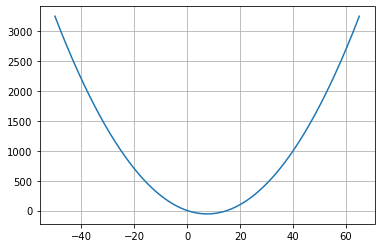

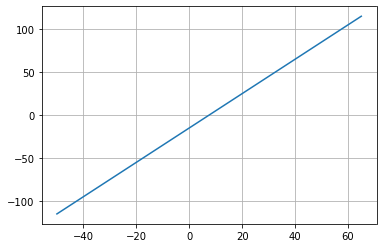

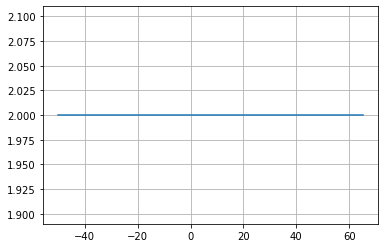

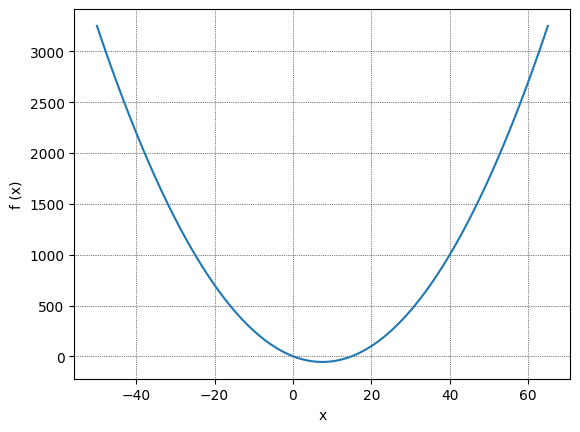

In [3]:
x=np.arange(-50,66,1)
fx=f(x)
plt.plot(x,fx)
plt.xlabel("x")
plt.ylabel("f (x)")
plt.grid(color='k',linestyle=':',linewidth=0.5)

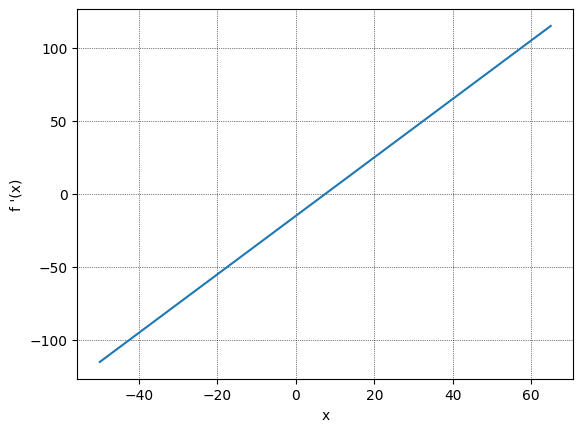

In [4]:
x=np.arange(-50,66,1)
fx=Df(x)
plt.plot(x,fx)
plt.xlabel("x")
plt.ylabel("f '(x)")
plt.grid(color='k',linestyle=':',linewidth=0.5)

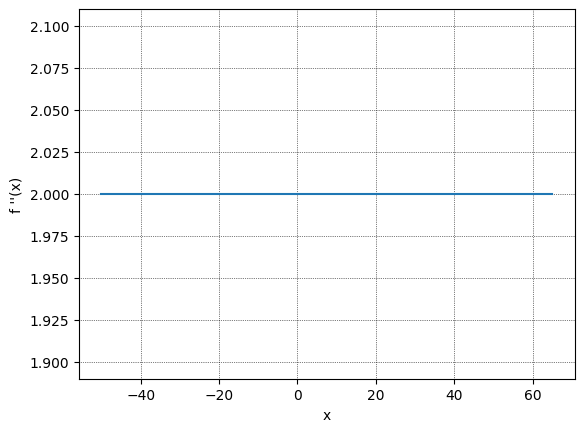

In [5]:
x=np.arange(-50,66,1)
fx=DDf(x)
plt.plot(x,fx)
plt.xlabel("x")
plt.ylabel("f ''(x)")
plt.grid(color='k',linestyle=':',linewidth=0.5)

In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [6]:
def gradient_descent(x,alpha,epsilon = 0.1, max_iter=500):
    for i in range (max_iter):
        f1x=Df(x)
        if abs(f1x) < epsilon:
            print("Found solution after",i,"iterations.")
            print("x_min = ", x)
            print("Gradient = ", f1x)
            break
        x=x-alpha*f1x

In [7]:
gradient_descent(40,0.01)

Found solution after 321 iterations.
x_min =  7.549596800192111
Gradient =  0.09919360038422198


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [ ]:
def newton(x,alpha=1,epsilon = 0.1, max_iter=500):
    for i in range (max_iter):
        f1x=Df(x)
        f2x=DDf(x)

        if abs(f1x) < epsilon:
            print("Found solution after",i,"iterations.")
            print("x_min = ", x)
            print("Gradient = ", f1x)
            break
        delta_x = - f1x / f2x
        x=x+alpha*delta_x

In [9]:
newton(40)

Found solution after 1 iterations.
x_min =  7.5
Gradient =  0.0


In [ ]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


In [10]:
newton(40,0.8)

Found solution after 5 iterations.
x_min =  7.5104
Gradient =  0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [11]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

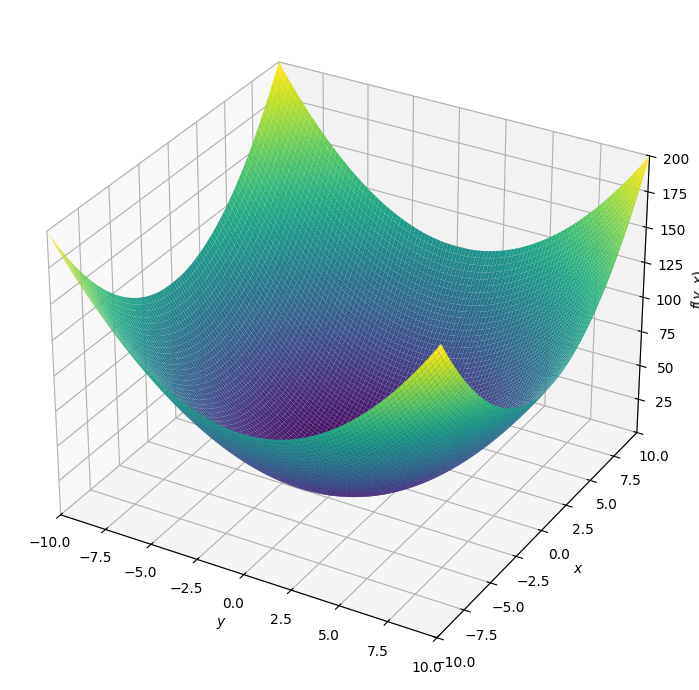

In [12]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

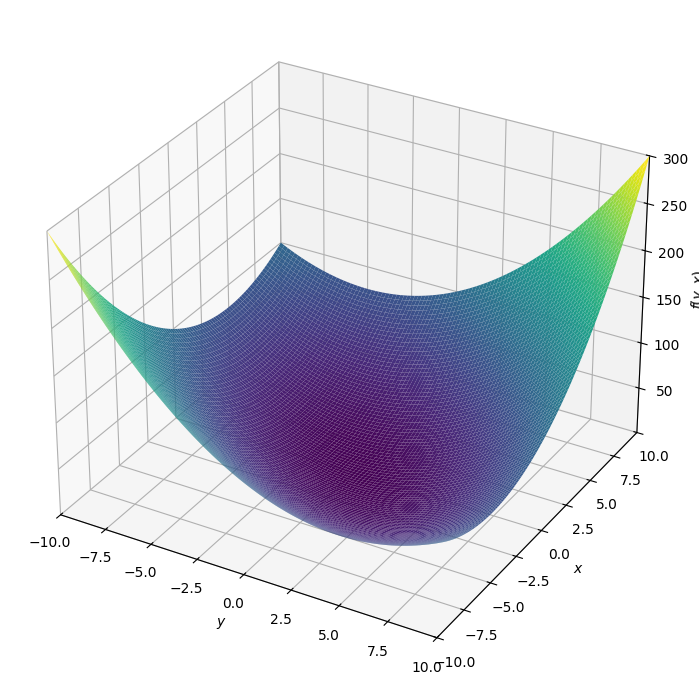

In [13]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

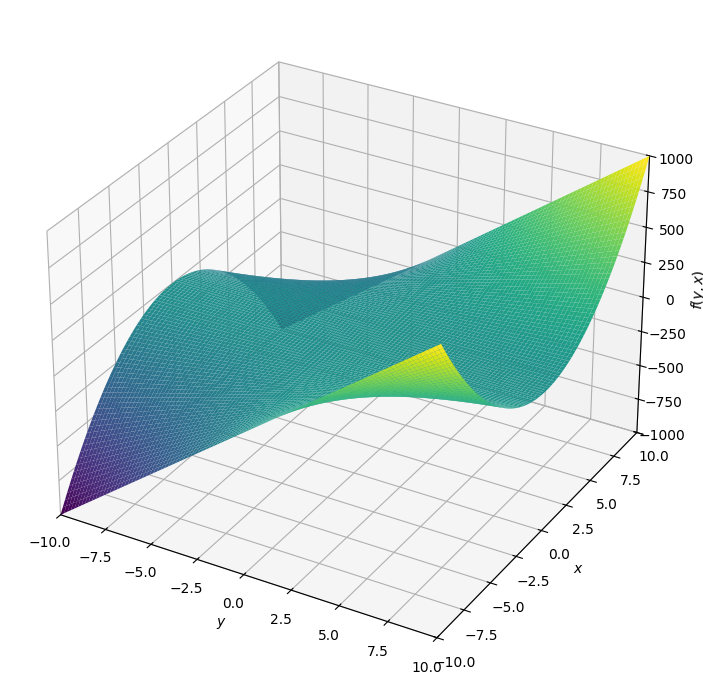

In [14]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [16]:
def gradient_descent_multi(x,first_derivative,alpha,epsilon, max_iter=500):
    for i in range (max_iter):
        f1x=first_derivative(x)
        x=x-alpha*f1x
        if all(abs(a) < epsilon for a in f1x):
            print("Found solution after",i,"iterations.")
            print("x_min = ", x)
            print("Gradient = ", first_derivative(x))
            break

In [17]:
def newton_multi(x,first_derivative,second_derivative,alpha=1,epsilon = 0.1, max_iter=500):
    for i in range (max_iter):
        f1x=first_derivative(x)
        f2x=second_derivative(x)
        
        if all((abs(a) < epsilon) for a in f1x):
            print("Found solution after",i,"iterations.")
            print("x_min = ", x)
            print("Gradient = ", first_derivative(x))
            break
        delta_x = -np.linalg.solve(f2x, f1x)
        x=x+alpha*delta_x


In [18]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [19]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [17]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [20]:
gradient_descent_multi((10,10),Df_1,0.1,0.001)

Found solution after 45 iterations.
x_min =  [0.00034845 0.00034845]
Gradient =  [0.0006969 0.0006969]


In [18]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [21]:
gradient_descent_multi((10,10),Df_1,0.5,0.001)

Found solution after 1 iterations.
x_min =  [0. 0.]
Gradient =  [0. 0.]


In [19]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [22]:
newton_multi((10,10),Df_1,DDf_1,alpha=1,epsilon = 0.001)

Found solution after 1 iterations.
x_min =  [0. 0.]
Gradient =  [0. 0.]


In [ ]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001


Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [23]:
newton_multi((10,10),Df_1,DDf_1,alpha=0.5,epsilon = 0.001)

Found solution after 15 iterations.
x_min =  [0.00030518 0.00030518]
Gradient =  [0.00061035 0.00061035]


In [21]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [24]:
gradient_descent_multi((10,10),Df_2,0.5,0.001)

Found solution after 15 iterations.
x_min =  [0.00015259 0.00015259]
Gradient =  [0.00045776 0.00045776]


In [22]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001



Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [25]:
newton_multi((10,10),Df_2,DDf_2,alpha=1,epsilon = 0.001)

Found solution after 1 iterations.
x_min =  [0. 0.]
Gradient =  [0. 0.]


In [23]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min = [0.0001 0.0001]
Gradient = [0.0003 0.0003]


In [26]:
newton_multi((10,10),Df_2,DDf_2,alpha=0.9,epsilon = 0.001)

Found solution after 5 iterations.
x_min =  [1.e-04 1.e-04]
Gradient =  [0.0003 0.0003]


In [27]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [25]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001


Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [28]:
gradient_descent_multi((10,10),Df_5,0.01,0.001)

Found solution after 79 iterations.
x_min =  [5.87348108e-05 6.85061189e+00]
Gradient =  [8.04738787e-04 3.44977800e-09]


In [26]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


In [29]:
newton_multi((10,10),Df_5,DDf_5,epsilon = 0.001)

Found solution after 9 iterations.
x_min =  [0.01953125 0.01953125]
Gradient =  [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [60]:
def BFGS(xk_1, x0, first_derivative, alpha=1, epsilon=0.001, max_iter=100):
    x_new = np.array(x0, dtype=np.float64)
    x = np.array(xk_1, dtype=np.float64)

    I = np.eye(len(x0))
    H = I 

    for i in range(max_iter):
        f1x = first_derivative(x)
        f1x_new = first_derivative(x_new)

        if np.linalg.norm(f1x_new) < epsilon:
            print("Found solution after", i, "iterations.")
            print("x_min =", x_new)
            print("Gradient =", f1x_new)
            return x_new

        step_change = x_new - x
        grad_change = f1x_new - f1x
        grad_step_dot = np.dot(grad_change, step_change)

        if grad_step_dot == 0:  
            break


        H = (I - np.outer(step_change, grad_change) / grad_step_dot) @ H @ (I - np.outer(grad_change, step_change) / grad_step_dot) + (np.outer(step_change, step_change) / grad_step_dot)

        x = x_new
        x_new = x_new - alpha * H @ f1x_new
        

: 

In [28]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 1 iterations.
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


In [61]:
BFGS((10,10),(9,9), Df_1)

Found solution after 1 iterations.
x_min = [0. 0.]
Gradient = [0. 0.]


array([0., 0.])

In [29]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.2545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715653


In [62]:
BFGS((10,10),(9,9), Df_1,0.9)

Found solution after 5 iterations.
x_min = [9.e-05 9.e-05]
Gradient = [0.00018 0.00018]


array([9.e-05, 9.e-05])

In [30]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 1 iterations.
xy_min = [[1.77635684e-15]
 [1.77635684e-15]]
Gradient = [[5.32907052e-15]
 [5.32907052e-15]]


In [63]:
BFGS((10,10),(9,9), Df_2)

Found solution after 1 iterations.
x_min = [3.55271368e-15 1.77635684e-15]
Gradient = [8.88178420e-15 7.10542736e-15]


array([3.55271368e-15, 1.77635684e-15])

In [31]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.0038183766184073705
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.00

In [64]:
BFGS((10,10),(9,9), Df_2,0.9)

Found solution after 5 iterations.
x_min = [9.e-05 9.e-05]
Gradient = [0.00027 0.00027]


array([9.e-05, 9.e-05])

In [32]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332

In [65]:
BFGS((10,10),(9,9), Df_5)

Found solution after 13 iterations.
x_min = [0.01534004 0.01534004]
Gradient = [0.00047063 0.00023532]


array([0.01534004, 0.01534004])